In [126]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
pd.options.display.float_format = '{:.5f}'.format
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

## Ⅰ. 2023년 현재 기준 대학 진학 인구 및 대학 분석

### 1. 지역별로 현재 대학 진학이 가능한 연령(20세)을 확인하자. 

In [21]:
df_age_18 = pd.read_csv('./data/age_18_by_city.csv', index_col=0, encoding='cp949')
df_age_18 # 2023년01월_계_연령구간인구수 = 18세

,2023년01월_계_총인구수,2023년01월_계_연령구간인구수,2023년01월_계_18세,2023년01월_남_총인구수,2023년01월_남_연령구간인구수,2023년01월_남_18세,2023년01월_여_총인구수,2023년01월_여_연령구간인구수,2023년01월_여_18세
행정구역,,,,,,,,,
전국,"51,430,018","468,291","468,291","25,631,538","242,177","242,177","25,798,480","226,114","226,114"
서울특별시,"9,424,873","77,852","77,852","4,567,739","39,916","39,916","4,857,134","37,936","37,936"
부산광역시,"3,316,107","26,446","26,446","1,618,749","13,600","13,600","1,697,358","12,846","12,846"
대구광역시,"2,362,880","21,967","21,967","1,162,217","11,555","11,555","1,200,663","10,412","10,412"
인천광역시,"2,969,502","26,793","26,793","1,486,300","13,754","13,754","1,483,202","13,039","13,039"
광주광역시,"1,429,816","15,251","15,251","706,724","7,895","7,895","723,092","7,356","7,356"
대전광역시,"1,445,806","14,602","14,602","721,037","7,584","7,584","724,769","7,018","7,018"
울산광역시,"1,110,074","10,626","10,626","570,113","5,633","5,633","539,961","4,993","4,993"
세종특별자치시,"384,496","4,070","4,070","191,769","2,007","2,007","192,727","2,063","2,063"


In [ ]:
# 그래프1) 지역별 18세 막대그래프

In [ ]:
# 그래프2) 지역별 18세 지도 버블차트

### 2. 전국 대학의 분포를 확인하자.

In [28]:
df_univ = pd.read_csv('./data/university_list_2022.csv', index_col=0, encoding='UTF8')
df_univ

,학교코드,학교명,본분교,학제,지역,설립구분,관련법령,법인명,학교상태,중문학교명,영문학교명,주소,영문주소,중문주소,우편번호,학교개교일,학교홈페이지,총장(대학원장)명,학교대표번호,학교대표팩스번호
학교구분,,,,,,,,,,,,,,,,,,,,
대학,1,강릉원주대학교,본교,대학교,강원,국립,고등교육법,해당없음,기존,国立江陵原州大学,Gangneung Wonju National University,"강원도 강릉시 죽헌길 7 (지변동, 강릉원주대학교)","7, Jukheon-gil, Gangneung-si, Gangwon-do, Repu...","7, Jukheon-gil, Gangneung-si, Gangwon-do, Repu...",25457.00000,1979-03-01,www.gwnu.ac.kr,반선섭,033-642-7001,033-643-7110
대학,2,강릉원주대학교,제2캠퍼스,대학교,강원,국립,고등교육법,해당없음,기존,国立江陵原州大学,Gangneung Wonju National University,"강원도 원주시 흥업면 남원로 150 (흥업리, 강릉원주대학교원주캠퍼스)","150, Namwon-ro, Heungeop-myeon, Wonju-si, Gang...","150, Namwon-ro, Heungeop-myeon, Wonju-si, Gang...",26403.00000,2007-03-01,www.gwnu.ac.kr,반선섭,033-760-8020,033-760-8029
대학,3,강원대학교,본교,대학교,강원,국립,고등교육법,해당없음,기존,江原大学校,Kangwon National University,"강원도 춘천시 강원대학길 1 (효자동, 강원대학교)","1, Gangwondaehak-gil, Chuncheon-si, Gangwon-do...","1, Gangwondaehak-gil, Chuncheon-si, Gangwon-do...",24341.00000,1970-03-01,www.kangwon.ac.kr/,김헌영,033-250-6114,033-251-9556
대학,4,강원대학교,제2캠퍼스,대학교,강원,국립,고등교육법,해당없음,기존,江原大学校,Kangwon National University,"강원도 삼척시 중앙로 346 (교동, 강원대학교삼척캠퍼스)","346, Jungang-ro, Samcheok-si, Gangwon-do, Repu...","346, Jungang-ro, Samcheok-si, Gangwon-do, Repu...",25913.00000,2006-03-01,www.kangwon.ac.kr/,김헌영,033-570-6114,033-572-8620
대학,5,경북대학교,본교,대학교,대구,국립,고등교육법,해당없음,기존,庆北大学校,Kyungpook National University,"대구광역시 북구 대학로 80 (산격동, 경북대학교)","80, Daehak-ro, Buk-gu, Daegu, Republic of Korea","80, Daehak-ro, Buk-gu, Daegu, Republic of Korea",41566.00000,1946-05-28,www.knu.ac.kr,홍원화,053-950-5114,053-950-2149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
대학원,3161,백석대학교 일반대학원,본교,일반대학원,서울,사립,고등교육법,백석대학교,신설,白石大學敎 白石大学研究所,Graduate School of Baekseok University,충청남도 천안시 동남구 백석대학로 1(안서동),"1, Baekseokdaehak-ro, Dongnam-gu, Cheonan-si, ...","1, Baekseokdaehak-ro, Dongnam-gu, Cheonan-si, ...",31065.00000,2022-03-02,NaN,장종현,02-520-0715,02-520-0720
대학원,3162,을지대학교 보건복지대학원,제3캠퍼스,특수대학원,경기,사립,고등교육법,을지학원,신설,保健福祉研究生院,"Eulji University, Graduate School of Health an...",경기도 의정부시 동일로 712(금오동),"712, Dongil-ro, Uijeongbu-si, Gyeonggi-do","712, Dongil-ro, Uijeongbu-si, Gyeonggi-do",11759.00000,2002-10-30,www.eulji.ac.kr,김규호,031-951-3621,031-951-3913
전문대학,3163,한국폴리텍 VII 대학 동부산캠퍼스,본교,기능대학,부산,사립,근로자직업능력개발법,한국폴리텍,신설,韩国产业技术大学 东釜山校园,Korea Polytechnics Dongbusan Campus,부산광역시 기장군 정관읍 산단4로 2-69,"2-69, Sandan 4-ro, Jeonggwan-eup, Gijang-gun, ...","2-69, Sandan 4-ro, Jeonggwan-eup, Gijang-gun, ...",46027.00000,1972-09-01,www.kopo.ac.kr/dongbusan,황선구,051-609-6000,051-728-5586


In [ ]:
# 그래프3) 전국 대학교의 위치정보(위도, 경도)를 지도에 점으로 표시

In [ ]:
# 그래프4) 시도 별 대학 개수 막대그래프

In [ ]:
# 그래프5) 전국 대학교의 위치정보(위도, 경도) + 지역별 18세 지도 버블차트

## Ⅱ. 신생아 수 추이 및 향후 예상 대학 충원율 분석

### 1. 전국의 신생아 수 추이 및 예상 신행아 수를 확인하자.

In [ ]:
# 전국의 신생아 수

In [31]:
df_newborn = pd.read_csv('./data/maternity_data.csv', index_col=0, encoding='cp949')
df_newborn #출생아수(명)

,출생아수(명),자연증가건수(명),조출생률(천명당),자연증가율(천명당),합계출산율(명),출생성비(명)
시점,,,,,,
1970,1006645,748056,31.20000,23.20000,4.53000,109.50000
1971,1024773,787245,31.20000,23.90000,4.54000,109.00000
1972,952780,742709,28.40000,22.20000,4.12000,109.50000
1973,965521,698061,28.30000,20.50000,4.07000,104.60000
1974,922823,674016,26.60000,19.40000,3.77000,109.40000
1975,874030,603373,24.80000,17.10000,3.43000,112.40000
1976,796331,529474,22.20000,14.80000,3.00000,110.70000
1977,825339,576085,22.70000,15.80000,2.99000,104.20000
1978,750728,498430,20.30000,13.50000,2.64000,111.30000


In [32]:
df_newborn_future = pd.read_csv('./data/newborn_future.csv', index_col=0, encoding='cp949')
df_newborn_future # 통계청 예측 연도별 출생아수(천명)

,출생아수 (천명),합계출산율
시점,,
1970,1007,4.53000
1971,1025,4.54000
1972,953,4.12000
1973,966,4.07000
1974,923,3.77000
...,...,...
2066,195,1.21000
2067,196,1.21000
2068,197,1.21000


In [ ]:
# 그래프5) 전국 1980년~2070년 신생아 수 꺾은선 그래프

In [ ]:
# 그래프6) 지역별 1980년~2070년 신생아 수 꺾은선 그래프

In [35]:
df_newborn_future_city = pd.read_csv('./data/newborn_by_city.csv', index_col=0, encoding='cp949')
df_newborn_future_city

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,,,,,
1991,709275,180301,59793,35236,40772,20063,18462,-,-,131016,19525,19081,21932,24563,28132,38276,64070,8053
1992,730678,182691,59702,36525,42840,21942,19737,-,-,136116,19817,20411,22560,25890,28373,39492,66058,8524
1993,715826,175827,56588,35933,41731,22062,20157,-,-,135225,19519,20786,22367,25737,26912,38698,65629,8655
1994,721185,175707,54427,36370,41680,22571,21397,-,-,138510,19518,20674,22345,26701,27313,38893,66229,8850
1995,715020,166236,52615,38779,41246,22907,21619,-,-,141710,19524,20974,23001,27183,28168,37158,65153,8747
1996,691226,152140,50139,36954,39285,21830,21039,-,-,142235,19432,20962,23397,26798,27651,36627,64118,8619
1997,675394,142724,46284,35219,38103,21684,20480,18273,-,143002,19821,21103,24551,26270,28080,37117,44138,8545
1998,641594,134604,43200,32231,35541,20796,19294,16697,-,137066,19421,20151,24472,25849,26841,34914,42427,8090
1999,620668,128120,41237,31308,34323,19244,18729,15740,-,134335,19143,19434,24045,24564,26363,34843,41184,8056


In [ ]:
# 2022~2070년 지역별 신생아수 예측값은 임의의 방법으로 총 출생아수 데이터에서 분할

### 2. 대학 정원 대비 대학 진학 가능 인구

In [ ]:
# 표7) 지역별 2022년 대학 정원 및 총 정원 pandas dataframe 표

In [37]:
df_enroll = pd.read_csv('./data/university_enrollment_2023.csv', index_col=0, encoding='cp949')
df_enroll[['학교종류','학교','입학정원(A)', '모집인원계']]

,학교종류,학교,입학정원(A),모집인원계
기준연도,,,,
2022,대학교,가야대학교(김해),460,490
2022,대학교,가천대학교,"4,081","4,694"
2022,대학교,가톨릭관동대학교,"1,824","1,957"
2022,대학교,가톨릭꽃동네대학교,108,115
2022,대학교,가톨릭대학교,"1,574","1,792"
...,...,...,...,...
2022,산업대학,호원대학교,"1,132","1,474"
2022,대학교,홍익대학교,"2,421","2,879"
2022,대학교,홍익대학교 _제2캠퍼스,"1,299","1,412"


In [42]:
# 그래프8) 2022년 대학 정원 대비 신생아가 대학 진학 연령(20세)가 되었을 경우 예상 대학 충원율 (막대or꺾은선그래프)
# ref. 예측신생아수 / 2022년 대학총정원으로 계산 하였음

------

> 목차 Ⅰ,Ⅱ에서 출생아 수와 대학 정원을 분석한 결과로 미루어보아,<br>
> <b>2023년 현재의 대학 정원 대비 <u>대학 진학 가능 인구는 지속적으로 감소</u></b>할 것이고,
> 그에 따라 <b><u>대학 수의 감소는 불가피</u></b>할 것이다.<br><br>
하기의 목차 Ⅲ,Ⅳ에서 여러 지표를 통해 한국 대학의 경쟁력을 비교하여 보고<br>
현재의 신생아가 대학 진학 연령이 되는 <span style="color:#B22222"><b>2040년을 기준으로 운영 위기에 처할 하위 대학 40%를 분석</b><span>해보자.

## Ⅲ. 2023년 현재 기준 전국 대학 분석

### 1. 전국 신입생 충원율

- 데이터 load

In [9]:
df_enroll = pd.read_csv('./data/university_enrollment_2023.csv', index_col=0, encoding='cp949')
df_enroll

,학교종류,설립구분,지역,상태,학교,입학정원(A),모집인원계,정원내(B),정원외,지원자계,정원내(C),정원외.1,입학자계,정원내(D)남,정원내(D)여,정원외남,정원외여,정원내 신입생 충원율(%) (D/B) × 100,경쟁률(C/B)
기준연도,,,,,,,,,,,,,,,,,,,
2022,대학교,사립,경남,기존,가야대학교(김해),460,490,463,27,"2,286","2,142",144,383,179,178,6,20,77.1,4.6
2022,대학교,사립,경기,기존,가천대학교,"4,081","4,694","4,083",611,"66,469","62,951","3,518","4,675","2,124","1,959",312,280,100.0,15.4
2022,대학교,사립,강원,기존,가톨릭관동대학교,"1,824","1,957","1,825",132,"7,556","6,926",630,"1,563",858,598,41,66,79.8,3.8
2022,대학교,사립,충북,기존,가톨릭꽃동네대학교,108,115,108,7,535,513,22,108,41,62,2,3,95.4,4.8
2022,대학교,사립,경기,기존,가톨릭대학교,"1,574","1,792","1,576",216,"21,304","20,077","1,227","1,770",697,876,79,118,99.8,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,산업대학,사립,전북,기존,호원대학교,"1,132","1,474","1,095",379,"11,878","11,125",753,"1,376",487,539,148,202,93.7,10.2
2022,대학교,사립,서울,기존,홍익대학교,"2,421","2,879","2,422",457,"41,971","39,180","2,791","2,876","1,314","1,105",167,290,99.9,16.2
2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,"1,299","1,412","1,302",110,"10,593","10,189",404,"1,383",644,653,44,42,99.6,7.8


In [48]:
# 그래프9) 지역별 충원율 평균

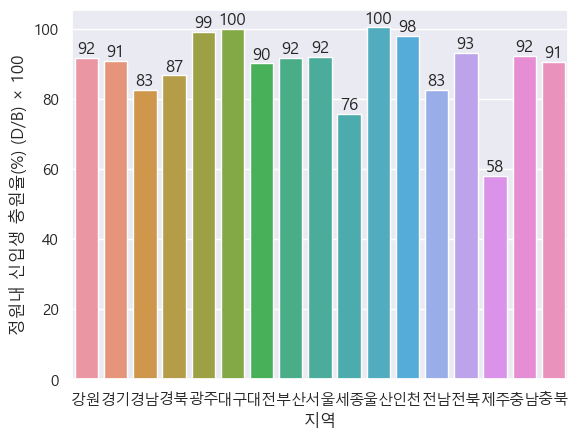

In [114]:
freshman_rate = df_enroll.groupby('지역')['정원내 신입생 충원율(%) (D/B) × 100'].mean(numeric_only=True).to_frame()
ax_freshman_rate = sns.barplot(data=freshman_rate, x=freshman_rate.index, y='정원내 신입생 충원율(%) (D/B) × 100')
for i in ax_freshman_rate.containers:
    ax_freshman_rate.bar_label(i, labels=[f'{x.get_height():.0f}' for x in ax_freshman_rate.containers[0]])


In [ ]:
# 그래프10) 지역별 충원율 도수분포표

In [132]:
df_enroll[df_enroll['학교']=='삼육대학교']

,학교종류,설립구분,지역,상태,학교,입학정원(A),모집인원계,정원내(B),정원외,지원자계,정원내(C),정원외.1,입학자계,정원내(D)남,정원내(D)여,정원외남,정원외여,정원내 신입생 충원율(%) (D/B) × 100,경쟁률(C/B)
기준연도,,,,,,,,,,,,,,,,,,,
2022,대학교,사립,서울,기존,삼육대학교,"1,137","1,243","1,138",105,"13,207","12,597",610,"1,224",530,609,41,44,100.10000,11.10000


In [228]:
# 권역별 (수도권, 강원권, 충청권, 경상권, 전라권, 제주권) 데이터 분리
df_capital = df_enroll[df_enroll.지역.isin(['서울','경기','인천'])] # 99
df_kangwon = df_enroll[df_enroll.지역.isin(['강원'])] #12
df_chugncheong = df_enroll[df_enroll.지역.isin(['대전','세종','충남','충북'])] #47
df_gyeongsang = df_enroll[df_enroll.지역.isin(['경남','경북','대구','부산','울산'])] #51
df_jeolla = df_enroll[df_enroll.지역.isin(['광주','전남','전북'])] #33
df_jeju = df_enroll[df_enroll.지역.isin(['제주'])] #33
print(len(df_enroll) == len(df_capital)+len(df_kangwon)+len(df_chugncheong)+len(df_gyeongsang)+len(df_jeolla)+len(df_jeju)) # 누락 없이 전체 분할 ok

# 권역 표기
df_capital.insert(2,'권역','수도권')
df_kangwon.insert(2,'권역','강원권')
df_chugncheong.insert(2,'권역','충청권')
df_gyeongsang.insert(2,'권역','경상권')
df_jeolla.insert(2,'권역','전라권')
df_jeju.insert(2,'권역','제주권')

# 권역이 표기된 데이터 concat
df_area_added = pd.concat([df_capital, df_kangwon, df_chugncheong, df_gyeongsang, df_jeolla, df_jeju])
df_area_added[['권역','지역','학교','정원내 신입생 충원율(%) (D/B) × 100']]

True


,권역,지역,학교,정원내 신입생 충원율(%) (D/B) × 100
기준연도,,,,
2022,수도권,경기,가천대학교,100.00000
2022,수도권,경기,가톨릭대학교,99.80000
2022,수도권,서울,가톨릭대학교 _제2캠퍼스,100.00000
2022,수도권,서울,가톨릭대학교 _제3캠퍼스,98.00000
2022,수도권,서울,감리교신학대학교,44.20000
...,...,...,...,...
2022,전라권,광주,호남대학교,95.40000
2022,전라권,광주,호남신학대학교,100.00000
2022,전라권,전북,호원대학교,93.70000


<AxesSubplot: xlabel='정원내 신입생 충원율(%) (D/B) × 100', ylabel='Count'>

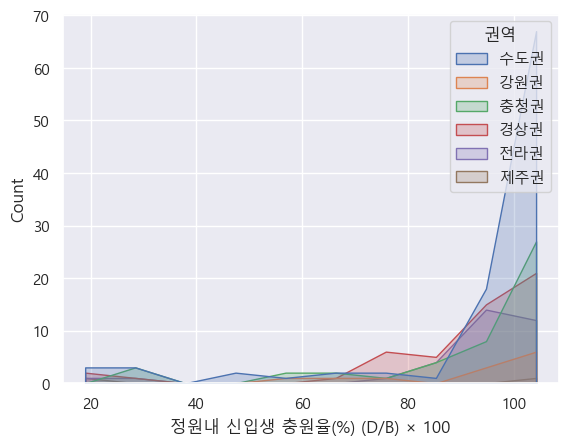

In [235]:
tmp = df_area_added[['권역','지역','학교','정원내 신입생 충원율(%) (D/B) × 100']]
sns.histplot(data=tmp, x='정원내 신입생 충원율(%) (D/B) × 100', hue='권역', bins=10, element='poly')

<AxesSubplot: xlabel='정원내 신입생 충원율(%) (D/B) × 100', ylabel='Count'>

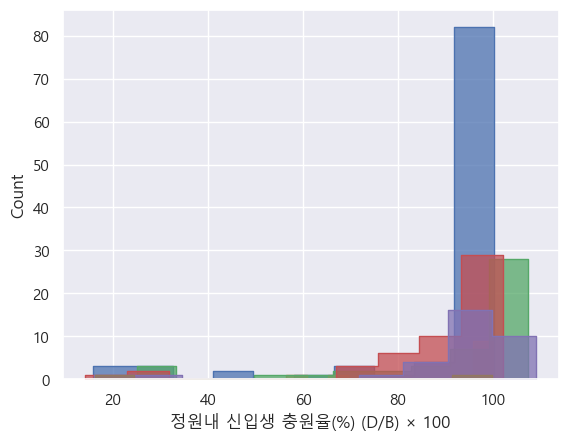

In [199]:
e_capital = df_capital[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_kangwon = df_kangwon[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_chugncheong = df_chugncheong[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_gyeongsang = df_gyeongsang[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_jeolla = df_jeolla[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_jeju = df_jeju[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
ax_c = sns.histplot(data=e_capital,x=e_capital['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count')
sns.histplot(data=e_kangwon,x=e_kangwon['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count')
sns.histplot(data=e_chugncheong,x=e_chugncheong['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count')
sns.histplot(data=e_gyeongsang,x=e_gyeongsang['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count')
sns.histplot(data=e_jeolla,x=e_jeolla['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count')
sns.histplot(data=e_jeju,x=e_jeju['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count')


### 2. 장학금 현황

In [309]:
df_scholarship = pd.read_csv('./data/university_scholarship_2022.csv', index_col=0, encoding='cp949')
df_scholarship

,설립별,지역별,교외장학금 소계(원),교외장학금 국가,교외장학금 지방자치단체,교외장학금 사설및기타,교내장학금 소계(원),교내장학금 성적우수장학금,교내장학금 저소득층장학금,교내장학금 근로장학금,교내장학금 재난장학금,교내장학금 교직원장학금,교내장학금 기타장학금,총계(원)
학교명,,,,,,,,,,,,,,
ICT폴리텍대학,사립,경기,368872500,219407500,0,149465000,82715000.00000,28500000,48492500,0,0,0,5722500,451587500
가야대학교(김해),사립,경남,4995635065,4957301385,7315680,31018000,2285214810.00000,674255020,915679450,129785340,0,35822000,529673000,7280849875
가천대학교,사립,경기,35109669872,34484846547,101976165,522847160,28256078762.00000,6294783100,8068027560,1480963771,10139300,176458600,12225706431,63365748634
가톨릭관동대학교,사립,강원,16159991032,15525791002,478532550,155667480,6660115923.00000,2922916230,906426550,210252628,115200000,156439000,2348881515,22820106955
가톨릭꽃동네대학교,사립,충북,1468923590,1382093430,1352160,85478000,605438779.00000,80527500,229202000,122970012,0,6618000,166121267,2074362369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
호산대학교,사립,경북,5107035203,5094396643,4938560,7700000,1930323602.00000,238839340,4064760,22629312,334580,9237920,1655217690,7037358805
호서대학교,사립,충남,25062148720,24078287690,613109030,370752000,16088791360.00000,4655425100,4008123640,1507796110,0,126488000,5790958510,41150940080
호원대학교,사립,전북,14773426820,14643067510,77136810,53222500,7202190410.00000,1387375600,91608200,197757260,2347250,104038000,5419064100,21975617230


In [300]:
type(df_s.loc['한국폴리텍 V 대학 순천캠퍼스']['교내장학금 소계(원)'])

numpy.float64

In [310]:
tmp_ = df_scholarship.replace(np.nan,0)
(tmp_.loc['한국폴리텍 V 대학 순천캠퍼스']['교내장학금 소계(원)'])

0.0

In [311]:
# 숫자 데이터 편집 str-> numeric -> formatting
# df_scholarship_f = df_scholarship[[ '교외장학금 소계(원)',
#  '교외장학금 국가', '교외장학금 지방자치단체', '교외장학금 사설및기타', '교내장학금 소계(원)',
#  '교내장학금 성적우수장학금', '교내장학금 저소득층장학금', '교내장학금 근로장학금',
#  '교내장학금 재난장학금', '교내장학금 교직원장학금', '교내장학금 기타장학금', '총계(원)']].apply(pd.to_numeric)
df_scholarship_f = df_scholarship.replace(np.nan, 0)
df_scholarship_f.loc[:, "교외장학금 소계(원)_f"] =df_scholarship_f["교외장학금 소계(원)"].map('{:,.0f}'.format)
df_scholarship_f.loc[:, "교내장학금 소계(원)_f"] =df_scholarship_f["교내장학금 소계(원)"].map('{:,.0f}'.format)
df_scholarship_f.loc[:, "총계(원)_f"] =df_scholarship_f["총계(원)"].map('{:,.0f}'.format)
df_scholarship_f[["설립별", "지역별","교외장학금 소계(원)_f", "교내장학금 소계(원)_f", "총계(원)_f"]]


,설립별,지역별,교외장학금 소계(원)_f,교내장학금 소계(원)_f,총계(원)_f
학교명,,,,,
ICT폴리텍대학,사립,경기,"368,872,500","82,715,000","451,587,500"
가야대학교(김해),사립,경남,"4,995,635,065","2,285,214,810","7,280,849,875"
가천대학교,사립,경기,"35,109,669,872","28,256,078,762","63,365,748,634"
가톨릭관동대학교,사립,강원,"16,159,991,032","6,660,115,923","22,820,106,955"
가톨릭꽃동네대학교,사립,충북,"1,468,923,590","605,438,779","2,074,362,369"
...,...,...,...,...,...
호산대학교,사립,경북,"5,107,035,203","1,930,323,602","7,037,358,805"
호서대학교,사립,충남,"25,062,148,720","16,088,791,360","41,150,940,080"
호원대학교,사립,전북,"14,773,426,820","7,202,190,410","21,975,617,230"


In [304]:
df_scholarship_f.columns.tolist()

['설립별',
 '지역별',
 '교외장학금 소계(원)',
 '교외장학금 국가',
 '교외장학금 지방자치단체',
 '교외장학금 사설및기타',
 '교내장학금 소계(원)',
 '교내장학금 성적우수장학금',
 '교내장학금 저소득층장학금',
 '교내장학금 근로장학금',
 '교내장학금 재난장학금',
 '교내장학금 교직원장학금',
 '교내장학금 기타장학금',
 '총계(원)',
 '교외장학금 소계(원)_f',
 '교내장학금 소계(원)_f',
 '총계(원)_f']

In [44]:
# 표10) 대학 별 장학금 수혜 분석

In [312]:
df_s = df_scholarship_f.sort_values(by=["총계(원)_f", "교외장학금 소계(원)_f", "교내장학금 소계(원)_f"], 
                                    ascending=[False, False, False])[["설립별", "지역별","교외장학금 소계(원)_f", "교내장학금 소계(원)_f", "총계(원)_f"]]
df_s
# df_s.iloc[:10,:]

,설립별,지역별,교외장학금 소계(원)_f,교내장학금 소계(원)_f,총계(원)_f
학교명,,,,,
웅지세무대학교,사립,경기,"236,941,585","759,727,460","996,669,045"
한국폴리텍 IV 대학 청주캠퍼스,사립,충북,"811,323,427","166,168,000","977,491,427"
부산장신대학교,사립,경남,"737,965,054","185,926,496","923,891,550"
한세대학교,사립,경기,"6,417,526,115","3,573,545,660","9,991,071,775"
대덕대학교,사립,대전,"7,549,733,660","2,439,405,060","9,989,138,720"
...,...,...,...,...,...
수원가톨릭대학교,사립,경기,"488,714,500","549,384,466","1,038,098,966"
영남외국어대학,사립,경북,"125,639,360","877,631,470","1,003,270,830"
정석대학,사립,서울,0,0,0


In [287]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 웅지세무대학교 to 한국폴리텍 V 대학 순천캠퍼스
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   설립별            391 non-null    object
 1   지역별            391 non-null    object
 2   교외장학금 소계(원)_f  391 non-null    object
 3   교내장학금 소계(원)_f  391 non-null    object
 4   총계(원)_f        391 non-null    object
dtypes: object(5)
memory usage: 18.3+ KB


In [288]:
type(df_s.loc['한국폴리텍 V 대학 순천캠퍼스']['교내장학금 소계(원)_f'])

str

In [308]:
# df_s = df_scholarship_f.sort_values(by=["총계(원)_f"], 
#                                     ascending=[False])[["설립별", "지역별","교외장학금 소계(원)_f", "교내장학금 소계(원)_f", "총계(원)_f"]]
# df_s

df_s = df_scholarship_f.sort_values(["총계(원)_f", "교외장학금 소계(원)_f"], ascending=[False, False])
# df_s
df_s.iloc[:10,:][["총계(원)_f", "교외장학금 소계(원)_f", "교내장학금 소계(원)_f"]]

,총계(원)_f,교외장학금 소계(원)_f,교내장학금 소계(원)_f
학교명,,,
웅지세무대학교,"996,669,045","236,941,585","759,727,460"
한국폴리텍 IV 대학 청주캠퍼스,"977,491,427","811,323,427","166,168,000"
부산장신대학교,"923,891,550","737,965,054","185,926,496"
한세대학교,"9,991,071,775","6,417,526,115","3,573,545,660"
대덕대학교,"9,989,138,720","7,549,733,660","2,439,405,060"
서울신학대학교,"9,970,628,277","7,367,871,254","2,602,757,023"
고려사이버대학교,"9,883,997,250","7,270,434,880","2,613,562,370"
계원예술대학교,"9,685,026,535","6,641,808,035","3,043,218,500"
용인예술과학대학교,"9,659,631,925","7,175,277,519","2,484,354,406"


In [ ]:
# 그래프11) 지역별 장학금 수혜 분석

###  3. 대학 랭킹

### 4. 각 지표를 반영한 대학 랭킹과 검증

In [ ]:
# 표13) 안전, 위험대학 분석

In [ ]:
그래프14) 부실대학 지도 표기

## Ⅳ. 2040년 기준 위험 대학 리스트

### 1. 전국 기준 하위 40% 로 위기에 처한 대학 리스트

### 2. 지역 기준 하위 40%로 위기에 처한 대학 리스트